<a href="https://colab.research.google.com/github/JitKum/Projects/blob/main/DataVisualization_A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib seaborn plotly pandas numpy squarify

In [3]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import squarify

In [40]:
# Load TRANSFERS data
d1 = files.upload()
transfers = pd.read_csv('TRANSFERS.csv')

Saving TRANSFERS.csv to TRANSFERS.csv


In [6]:
# Load ADMISSIONS data
d2 = files.upload()
admissions = pd.read_csv('ADMISSIONS.csv')

Saving ADMISSIONS.csv to ADMISSIONS.csv


In [4]:
# Load PRESCRIPTIONS data
d3 = files.upload()
prescriptions = pd.read_csv('PRESCRIPTIONS.csv')

Saving PRESCRIPTIONS.csv to PRESCRIPTIONS.csv


In [43]:
# Load CHARTEVENTS data
d4 = files.upload()
chartevents = pd.read_csv('CHARTEVENTS.csv')

Saving CHARTEVENTS.csv to CHARTEVENTS.csv


<ipython-input-43-a4300d8a243b>:3: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents = pd.read_csv('CHARTEVENTS.csv')


In [37]:
# Load SERVICES data
d5 = files.upload()
services = pd.read_csv('SERVICES.csv')

Saving SERVICES.csv to SERVICES.csv


In [21]:
# Load PATIENTS data
d6 = files.upload()
patients = pd.read_csv('PATIENTS.csv')

Saving PATIENTS.csv to PATIENTS.csv


In [13]:
# Load DIAGNOSES data
d7 = files.upload()
diagnosis = pd.read_csv('DIAGNOSES_ICD.csv')

Saving DIAGNOSES_ICD.csv to DIAGNOSES_ICD.csv


In [35]:
# Load ICUSTAYS data
d8 = files.upload()
icustays  = pd.read_csv('ICUSTAYS.csv')

Saving ICUSTAYS.csv to ICUSTAYS.csv


In [13]:
# Load LABEVENTS data
d9 = files.upload()
labevents = pd.read_csv('LABEVENTS.csv')

Saving LABEVENTS.csv to LABEVENTS.csv


In [23]:
# Load D_LABITEMS data
d10 = files.upload()
labitems = pd.read_csv('D_LABITEMS.csv')

Saving D_LABITEMS.csv to D_LABITEMS.csv


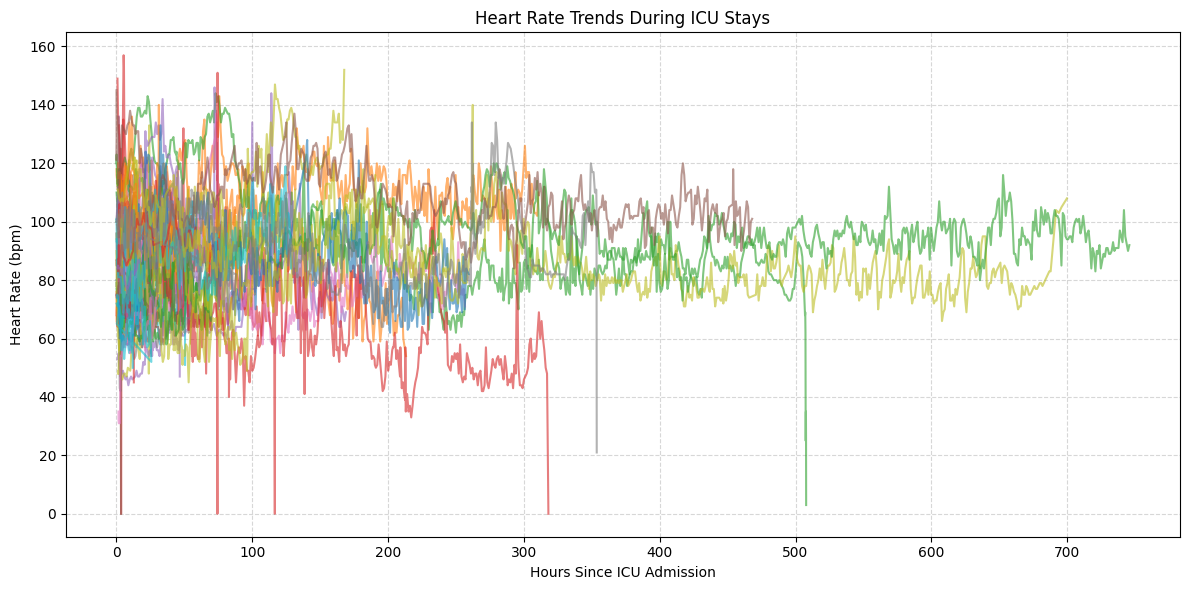

In [44]:
## 1. Heart Rate Trends During ICU Stays

# Filter heart rate data (ITEMID 220045)
heart_rate_data = chartevents[chartevents['itemid'] == 220045]

# Merge with icustays data and convert to datetime
heart_rate_data = heart_rate_data.merge(icustays[['hadm_id', 'intime', 'outtime']], on='hadm_id')
heart_rate_data[['charttime', 'intime', 'outtime']] = heart_rate_data[['charttime', 'intime', 'outtime']].apply(pd.to_datetime)

# Filter readings within ICU stays and calculate hours since admission
heart_rate_data = heart_rate_data[(heart_rate_data['charttime'] >= heart_rate_data['intime']) & (heart_rate_data['charttime'] <= heart_rate_data['outtime'])]
heart_rate_data['hours_since_admit'] = (heart_rate_data['charttime'] - heart_rate_data['intime']).dt.total_seconds() / 3600

# Plot for heart rate trends
plt.figure(figsize=(12, 6))
for _, patient_data in heart_rate_data.groupby('hadm_id'):
    plt.plot(patient_data['hours_since_admit'], patient_data['valuenum'], alpha=0.6)
plt.title("Heart Rate Trends During ICU Stays")
plt.xlabel("Hours Since ICU Admission")
plt.ylabel("Heart Rate (bpm)")
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

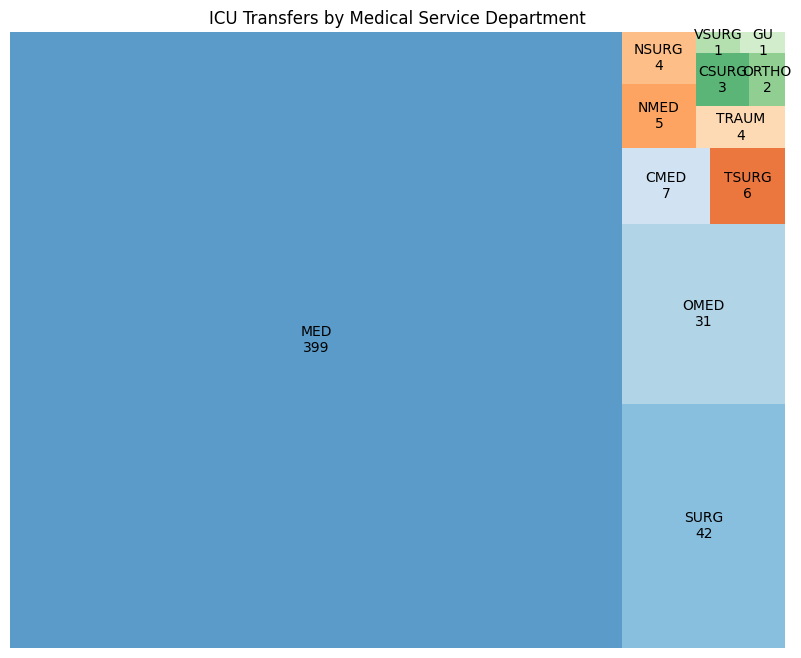

In [54]:
## 2. ICU Transfers by Medical Service Department

# Filter for ICU transfers
merged_data_transfers = pd.merge(transfers, services, on="subject_id", how="inner")
icu_transfers = merged_data_transfers[merged_data_transfers['curr_careunit'].str.contains('ICU', na=False)]

# Calculate service type counts
service_counts = icu_transfers['curr_service'].value_counts().reset_index()
service_counts.columns = ['Service Type', 'Count']

# Treemap Visualization
plt.figure(figsize=(10, 8))
labels = [f"{row['Service Type']}\n{row['Count']}" for _, row in service_counts.iterrows()]
sizes = service_counts['Count']
colors = cm.tab20c(range(len(sizes)))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors)
plt.title("ICU Transfers by Medical Service Department")
plt.axis('off')
plt.show()

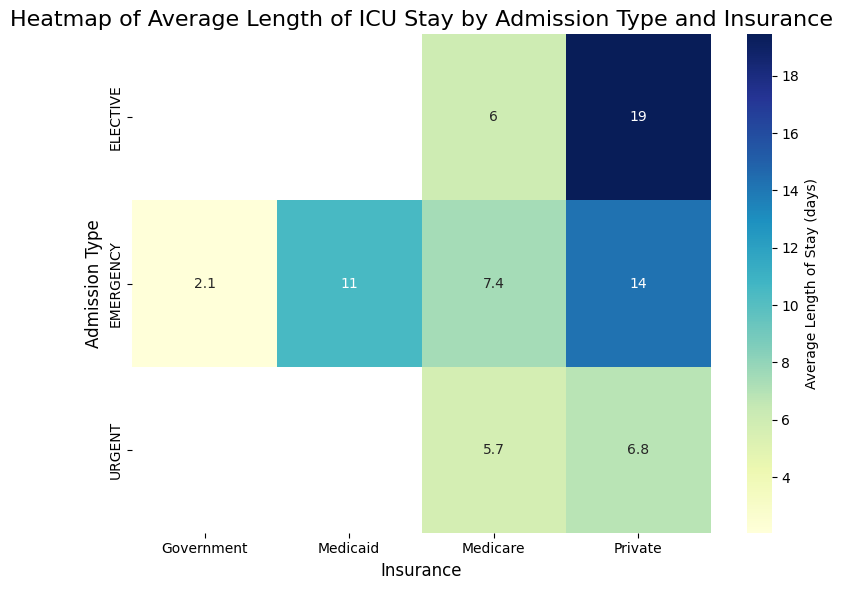

In [38]:
## 3. ICU Stay by Admission Type and Insurance

# Merge admissions and icustays on 'hadm_id' (hospital admission ID)
merged_data_admissions = pd.merge(admissions, icustays, on='hadm_id', how='inner')

# Convert 'intime' and 'dischtime' to datetime format
merged_data_admissions['intime'] = pd.to_datetime(merged_data_admissions['intime'], errors='coerce')
merged_data_admissions['dischtime'] = pd.to_datetime(merged_data_admissions['dischtime'], errors='coerce')

# Calculate 'days_since_admit' (Length of Stay) in days
merged_data_admissions['days_since_admit'] = (
    (merged_data_admissions['dischtime'] - merged_data_admissions['intime']).dt.total_seconds() / (3600*24)
)

# Pivot the data for a heatmap (mean LOS for each admission type and insurance)
heatmap_data = merged_data_admissions.pivot_table(values='days_since_admit', index='admission_type', columns='insurance', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Average Length of Stay (days)'})
plt.title('Heatmap of Average Length of ICU Stay by Admission Type and Insurance', fontsize=16)
plt.xlabel('Insurance', fontsize=12)
plt.ylabel('Admission Type', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-50-cd81c0addde0>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glucose_data['age_group'] = pd.cut(glucose_data['age'], bins=[0, 18, 40, 60, 80, 120], labels=['0-18', '19-40', '41-60', '61-80', '80+'])
<ipython-input-50-cd81c0addde0>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glucose_data['glucose_group'] = pd.cut(glucose_data['value'], bins=glucose_bins, labels=glucose_labels, include_lowest=True)


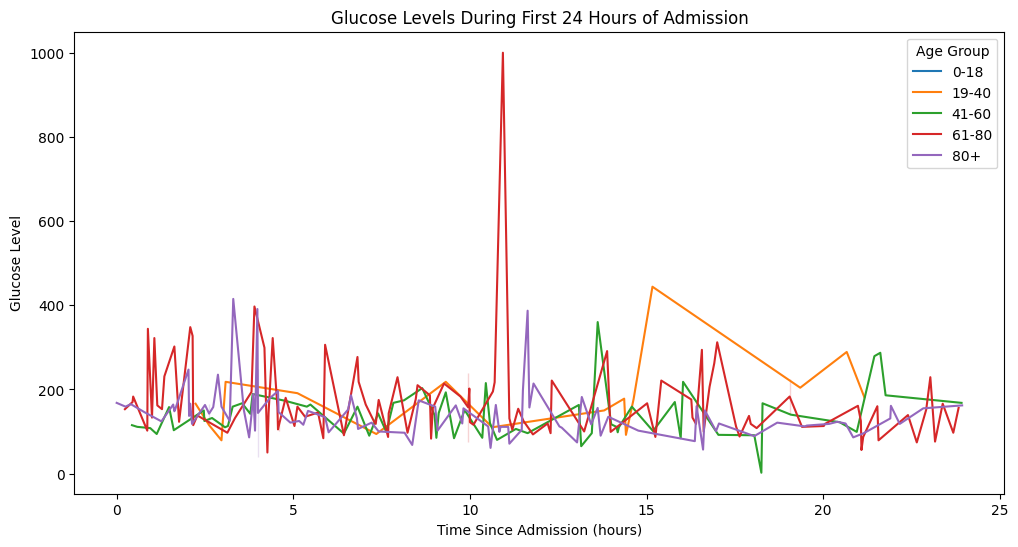

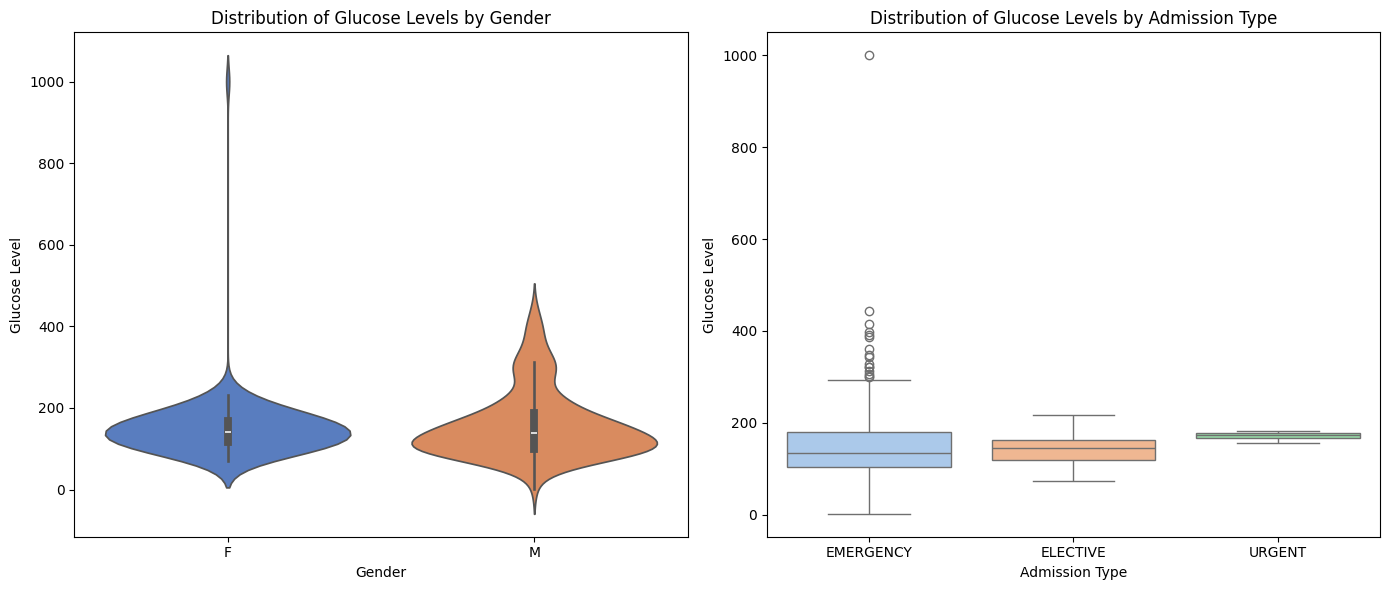

In [50]:
## 4. Monitoring Glucose Levels by Age, Gender, and Admission Type

from datetime import datetime
# Convert date columns to datetime
admissions['admittime'] = pd.to_datetime(admissions['admittime'], errors='coerce')
patients['dob'] = pd.to_datetime(patients['dob'], errors='coerce')
patients['dod'] = pd.to_datetime(patients['dod'], errors='coerce')
labevents['charttime'] = pd.to_datetime(labevents['charttime'], errors='coerce')

# Filter and clean glucose data
glucose_item_ids = labitems[labitems['label'].str.contains('glucose', case=False,)]['itemid'].unique()
glucose_data = labevents[labevents['itemid'].isin(glucose_item_ids)].copy()
glucose_data['value'] = pd.to_numeric(glucose_data['value'], errors='coerce')
glucose_data.dropna(subset=['value'], inplace=True)

# Merge glucose data with admissions and patients
glucose_data = glucose_data.merge(admissions[['hadm_id', 'subject_id', 'admittime', 'admission_type']], on='subject_id')
glucose_data = glucose_data.merge(patients[['subject_id', 'dob', 'gender', 'dod']], on='subject_id')

# Calculate age
glucose_data['age'] = (glucose_data['dod'].dt.year - glucose_data['dob'].dt.year)
glucose_data = glucose_data[(glucose_data['age'] >= 0) & (glucose_data['age'] <= 120)]

# Calculate time since admission and filter data within the first 24 hours
glucose_data['time_since_admission'] = (glucose_data['charttime'] - glucose_data['admittime']).dt.total_seconds() / 3600
glucose_data = glucose_data[(glucose_data['time_since_admission'] >= 0) & (glucose_data['time_since_admission'] <= 24)]

# Define bins for age group and glucose levels
glucose_data['age_group'] = pd.cut(glucose_data['age'], bins=[0, 18, 40, 60, 80, 120], labels=['0-18', '19-40', '41-60', '61-80', '80+'])
glucose_bins = [0, 70, 140, 200, 300, glucose_data['value'].max()]
glucose_labels = ['0-70', '71-140', '141-200', '201-300', '300+']
glucose_data['glucose_group'] = pd.cut(glucose_data['value'], bins=glucose_bins, labels=glucose_labels, include_lowest=True)

# Visualization 1: Trend plot of glucose levels over time with grouped age levels
plt.figure(figsize=(12, 6))
sns.lineplot(data=glucose_data, x='time_since_admission', y='value', hue='age_group', errorbar='sd')
plt.title('Glucose Levels During First 24 Hours of Admission')
plt.xlabel('Time Since Admission (hours)')
plt.ylabel('Glucose Level')
plt.legend(title='Age Group')
plt.show()

# Visualization 2: Subplots for violin plot by gender and box plot by admission type
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.violinplot(data=glucose_data, x='gender', y='value', ax=axes[0], hue='gender', palette='muted')
axes[0].set_title('Distribution of Glucose Levels by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Glucose Level')

sns.boxplot(data=glucose_data, x='admission_type', y='value', ax=axes[1], hue='admission_type', palette='pastel')
axes[1].set_title('Distribution of Glucose Levels by Admission Type')
axes[1].set_xlabel('Admission Type')
axes[1].set_ylabel('Glucose Level')

plt.tight_layout()
plt.show()


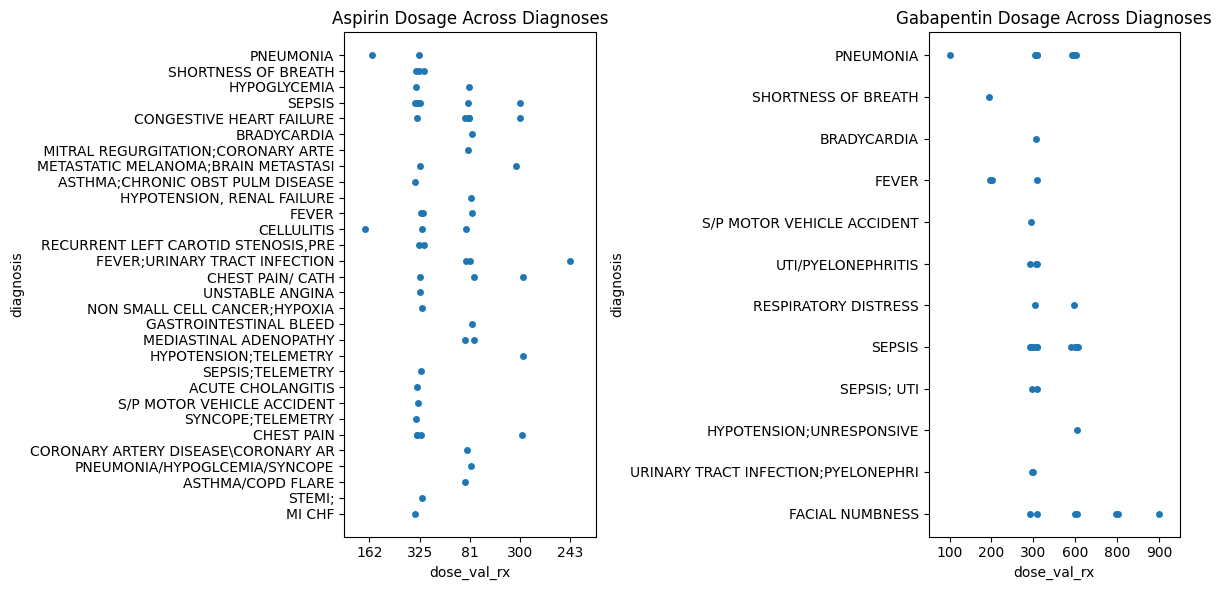

In [19]:
## 5. Medication Dosage Across Diagnoses

# Function to prepare data and create strip plot
def plot_medication_dosage(drug_name, ax, title):
    med_filtered = prescriptions[prescriptions['drug'] == drug_name]
    med_merged = pd.merge(med_filtered, admissions, on='hadm_id')
    med_merged['diagnosis'] = med_merged['diagnosis'].str[:35]
    sns.stripplot(y="diagnosis", x="dose_val_rx", data=med_merged, jitter=True, ax=ax)
    ax.set_title(title)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_medication_dosage('Aspirin', axes[0], 'Aspirin Dosage Across Diagnoses')
plot_medication_dosage('Gabapentin', axes[1], 'Gabapentin Dosage Across Diagnoses')
plt.tight_layout()
plt.show()
